# Linear regression from scratch

## Generating the data from linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# training ---> adjust the weights and biases
# testing ---> Use the trained weights and biases for predictions

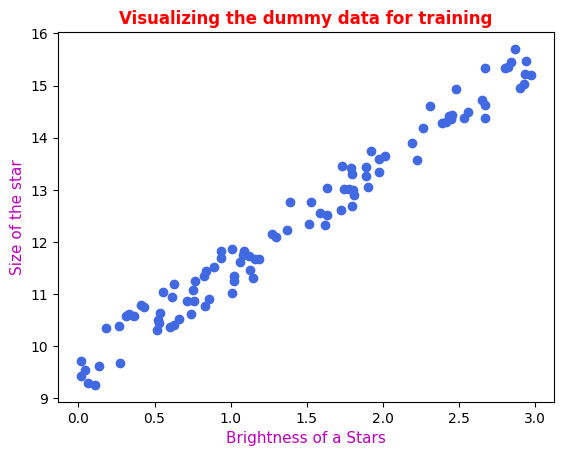

In [3]:
# Use the seed value of 100 so that everyone gets the same output
np.random.seed(100)

# Generate Randomized dataset ---> X_train, Y_train
"""
X_train = 3*random numbers between 0 and 1 of shape(100, 1)
y_train = 9 + 2*X_train + noise, where noise is a random number between 0 and 1 and its shape is (100,1)
The noise will allow to have some randomness in output instead of it simply being in a straight line

Our goal of this session is to train ML Model --> Linear Regression to predict the values of 9 and 2 in y_train
In reality we don't have the y_train formula . Hence we make the ML model to predict what should be the formula!
"""
x_train = 3*np.random.rand(100,1)
# y_train = 2*x_train + 9
y_train = 2*x_train + 9 + np.random.rand(100,1)

# Scatter Plot -->  Figsize is (8,6), XLabel is brightness, yLabel is size, and title
plt.scatter(x_train, y_train, color='royalblue')
plt.title('Visualizing the dummy data for training', color='red', weight='bold')
plt.xlabel('Brightness of a Stars', fontsize = 11, color='m')
plt.ylabel('Size of the star', fontsize = 11, color='m')
plt.show()


In [4]:
# Print the first 5 values in x_train and y_train
print('Print the first 5 values of x_train :-\n')
print(x_train[:5])
print('Print the first 5 values of y_train :-\n')
print(y_train[:5])

Print the first 5 values of x_train :-

[[1.63021483]
 [0.83510816]
 [1.27355277]
 [2.5343284 ]
 [0.01415657]]
Print the first 5 values of y_train :-

[[13.03871887]
 [11.44981471]
 [12.1574337 ]
 [14.37765714]
 [ 9.72604804]]


# Model Parameters and Hyperparameters
Remember that instead of using gradient and y_intercept, we will be using the actual model parameters for ML algorithms - Weight and Bias!

In [5]:
# Initialize the weight(W) and bias(B)
W = 0
b = 0

# Hyperparameters --> Choose the appropriate learning rate (0.01)
learning_rate = 0.01

# Computing equations for Forward Propagation

In [6]:
# Create a function for predicted output
def predict(x, w, b):
  '''
  X - Full X array Data (train/test)
  w - weight value
  b - bias value

  return - predicted output

  '''
  return x*w + b

# Mean Square Error(MSE) Function
def cost_function(x, y, w, b):
  '''
  X - Full X array data(train/test)
  W - Weight value
  b - bias value
  y - Full y array data (train/test)
  Returns - MSE
  '''
  y_pred = predict(x, W, b)
  squared_error = (y-y_pred)**2
  return np.mean(squared_error)


In [7]:
y_pred_dummy = predict(x_train, W, b)
print(len(y_pred_dummy))

100


In [8]:
# Check for the cost function
cost_function(x_train, y_train, W, b)

155.64746471475698

# Computing equations for the back propagation

In [9]:
def update_params(x, y, W, b, learning_rate):
  '''
  x - full array data(train/test)
  y - full array data(train/test)
  W - Weight Value
  b - bias value
  learning_rate - alpha value --> step value

  returns update w and b
  '''
  error_term = y-predict(x, W, b)
  dJdW = np.mean(-2*x*error_term)
  dJdb = np.mean(-2*error_term)
  W = W - learning_rate*dJdW
  b = b - learning_rate*dJdb
  return W, b

In [10]:
# Check the update params function
update_params(x_train, y_train, W, b, learning_rate)

(0.37996848499034985, 0.2470683141174928)

In [11]:
# Epoch by epoch train the linear regression to get the best value for W and b
def train(x, y, W, b, learning_rate, tol = 1e-13, verbose=False):
  '''
  x - Full array x data(train/test)
  y - Full array y data(train/test)
  W - Weight value
  b - bias value
  learning_rate -> alpha value --> step size
  tol -> threshold for when the training should stop based on the convergence
  verbose -> display the training if it is set to true

  Returns :-
  Weights - list of all the updated weight values in the iterations(epochs)
  biases - list of all the updated bias values in the iterations
  costs - list of all the cost values based on W and b values in the iterations
  i - interaction count at the end of training
  '''
  # Lists of the updated weights and biases and also the cost w.r.t. these weights and biases
  weights = [W]
  biases = [b]
  costs = []

  # Initialize the counter
  i = 0
  '''
  0) Intialize the counter
  This is the training loop

  1) Get the cost value based on the current W and b
  2) Add the cost value to that empty lists of costs
  3) Break the loop if the cost value are converging
  4) If the loop is not stopped , update the values of W and b
  5) Adding the values to the respective list of weights and biases
  6) Print the training progress after every 100 iterations
  7) Update the counter value
  '''

  while True:
    # Calculate the costs and append it to the respective lists
    cost = cost_function(x, y, W, b)
    costs.append(cost)

    # Break the loop if the values in the costs list have converged
    if i>=1 and abs(costs[-1]-costs[-2])<tol:
      break
    # Update the values of W and b
    W, b = update_params(x_train, y_train, W, b, learning_rate)
    weights.append(W)
    biases.append(b)

    # Print the training history after every 100 iterations
    if verbose and (i+1)%100==0:
      print(f'After {i+1} iterations, weight = {W}, bias = {b}, cost = {cost}')

    # Update the iteration count
    i = i+1

  return weights, biases, costs, i

In [12]:
# Train the linear regression model
weights, biases, costs, epochs = train(x_train, y_train, W, b, learning_rate, tol=1e-13, verbose=True)

After 100 iterations, weight = 4.3222942048210085, bias = 5.327063373770924, cost = 52.66505458003624
After 200 iterations, weight = 3.51412009319501, bias = 6.7890242662687115, cost = 34.133831741869294
After 300 iterations, weight = 2.9835540281786326, bias = 7.743346998568343, cost = 24.364133039182732
After 400 iterations, weight = 2.6367501624690695, bias = 8.367135449635883, cost = 18.971031674882056
After 500 iterations, weight = 2.410063191668252, bias = 8.77487229347111, cost = 15.870035119186031
After 600 iterations, weight = 2.2618901532412243, bias = 9.041387862566092, cost = 14.024314434047879
After 700 iterations, weight = 2.1650374349793493, bias = 9.215594706132114, cost = 12.895298974783792
After 800 iterations, weight = 2.101730040231323, bias = 9.329464317758527, cost = 12.190405796998194
After 900 iterations, weight = 2.0603494130098348, bias = 9.403894737290441, cost = 11.743790111246863
After 1000 iterations, weight = 2.0333011303240744, bias = 9.452545885499076, 

In [13]:
# Comparing initial and final values
import pandas as pd
initial = [weights[0], biases[0], costs[0]]
final = [weights[-1], biases[-1], costs[-1]]

df = pd.DataFrame(list(zip(initial, final)),
                  columns = ['Initial', 'Final'],
                  index = ['Weight', 'Bias', 'Cost'])
df

,Initial,Final
Weight,0.000000,1.982255
Bias,0.000000,9.544361
Cost,155.647465,10.931372


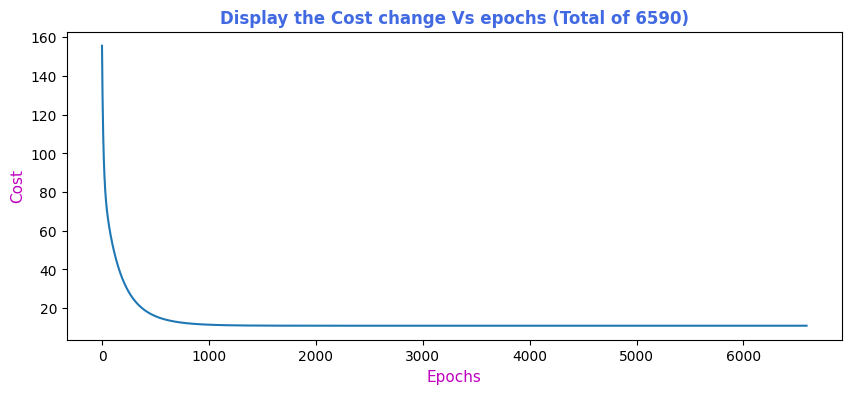

In [15]:
# Visualizing the cost wrt epochs -> Figsize is (10,4), plot epochs on x, costs on y, add labels and title
plt.figure(figsize=(10,4))
plt.plot(costs)
plt.xlabel('Epochs', color='m', fontsize = 11)
plt.ylabel('Cost', color='m', fontsize=11)
plt.title(f'Display the Cost change Vs epochs (Total of {epochs})', color = 'royalblue', weight='bold')
plt.show()

In [18]:
# Define a seed value(using different seed value compared to training set to avoid data leakage!) --> 5007
np.random.seed(5007) # This number was chosen to get optimal results with random values

# Test Data
x_test = 3*np.random.rand(10,1)
y_test = 9 + 2*x_test + np.random.rand(10,1)

prediction = predict(x_test, weights[-1], biases[-1])

# Dataframe to compare true and predicted outputs on the test inputs
df1 = pd.DataFrame(list(zip(x_test.reshape(10,), y_test.reshape(10,), prediction.reshape(10,))),
                   columns = ['Test Input', 'True Output', 'Predicted Output'])
df1

,Test Input,True Output,Predicted Output
0,0.723836,10.889388,10.979190
1,1.900129,13.358554,13.310901
2,0.126943,9.974414,9.795994
3,2.026471,13.566160,13.561344
4,2.647429,14.842352,14.792241
5,1.238825,12.071978,12.000029
6,1.561243,12.881255,12.639143
7,2.042729,13.622504,13.593572
8,1.230220,12.098017,11.982971
9,0.382516,10.325675,10.302607


In [20]:
# Calculate the mean squared error to evaluate the performance
mse = np.mean((y_test - prediction)**2)
print(f'The MSE for the test data is {round(mse, 5)} (5 decimal places) ')
# Calculating the root mean squared error
rmse = np.sqrt(np.mean((y_test - prediction)**2))
print(f'The RMSE for the test data is {round(rmse, 5)} (5 decimal places)')

The MSE for the test data is 0.01231 (5 decimal places) 
The RMSE for the test data is 0.11095 (5 decimal places)


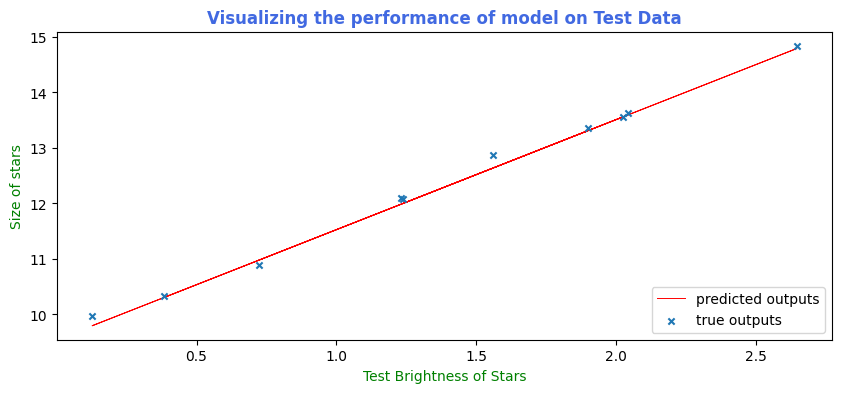

In [30]:
# Visualize the performance of the test data -->(10, 4) figsize, plot(x_test, prediction) and (x_test, y_test)
# Customize it

plt.figure(figsize=(10,4))
plt.plot(x_test, prediction, label = 'predicted outputs', color = 'red', lw = 0.7)
plt.scatter(x_test, y_test, label = 'true outputs', marker = 'x', zorder = 2, s=20) # Zorder = 2 brings the scatter points on the top of the line(2nd z position from bottom)
plt.xlabel('Test Brightness of Stars', color = 'green')
plt.ylabel('Size of stars', color = 'green')
plt.title('Visualizing the performance of model on Test Data', color = 'royalblue', weight = 'bold')
# plt.legend()
plt.legend(loc = 'lower right')
plt.show()

# THE END